[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.05000000e+00]
 [ 1.00000000e-02  1.00000000e-02  9.98674232e-01  1.08141593e+00]
 [ 2.00000000e-02  1.99867423e-02  9.97413743e-01  1.11283185e+00]
 ...
 [ 2.99980000e+02 -1.02778759e-01 -8.64684332e-02  9.43464964e+02]
 [ 2.99990000e+02 -1.03643443e-01 -7.62421301e-02  9.43496380e+02]
 [ 3.00000000e+02 -1.04405864e-01 -6.59407465e-02  9.43527796e+02]]


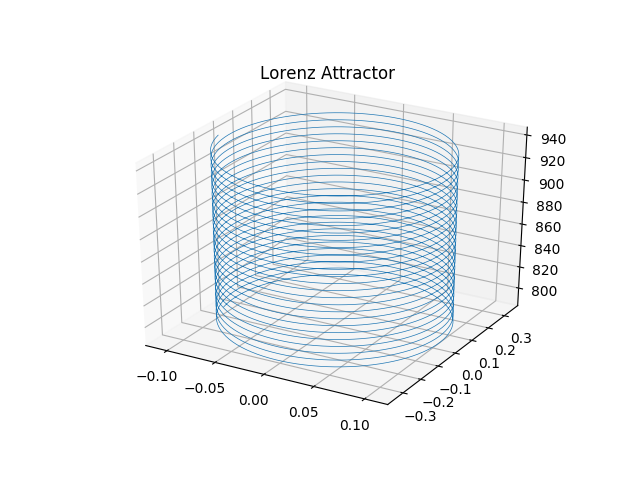

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib widget

def vdps(xyz, *, a=5, b=28, u=2.667):
    _, x, y, z = xyz
    x_dot = 0.7*y - (1-10*y*y)*x
    y_dot = -x + np.sin(z)
    z_dot = np.pi
    return np.array([1, x_dot, y_dot, z_dot])

def duffing(xyz, *, d=1, b=1):
    _, x, y, z = xyz
    x_dot = y
    y_dot = -d*y + x*x*x - x + b*np.sin(z)
    z_dot = np.pi
    return np.array([1, x_dot, y_dot, z_dot])

dt = 0.01
num_steps = 30000

xyzs = np.empty((num_steps + 1, 4))  # Need one more for the initial values
xyzs[0] = (0, 0., 1., 1.05)  # Set initial values
# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + duffing(xyzs[i]) * dt

# Plot
print(xyzs)
ax = plt.figure().add_subplot(projection='3d')

xyz_coords = np.empty((num_steps+1, 3))
for i in range(num_steps+1):
    xyz_coords[i] = xyzs[i][1:]

#print(xyz_coords)
    
ax.plot(*xyz_coords[25000:].T, lw=0.5)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

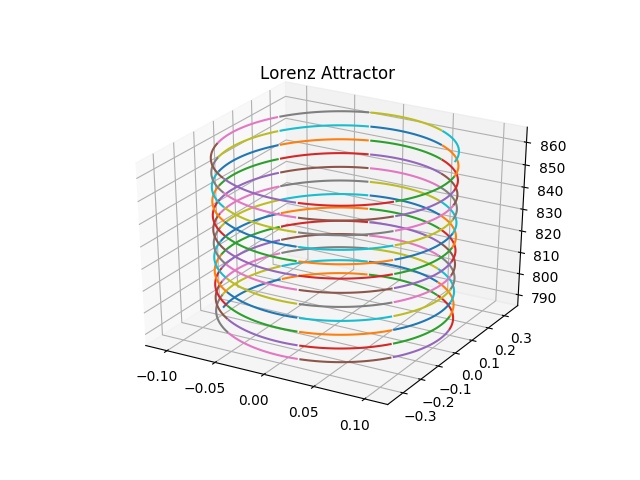

[6.4, 4.8]

In [2]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

xyzs = xyzs[25000:]
xyz_coords = xyz_coords[25000:]
num_steps = len(xyzs)
#num_steps=num_steps-5000

traj_list = []
#num_steps=250
length = 25
i = 0
while i+length<num_steps:
    traj_list.append(xyzs[i:i+length])
    i = i+int(1*length)

ax = plt.figure().add_subplot(projection='3d')

for i in range(0,100):
    ax.plot(*xyz_coords[i*length:(i+1)*length].T)
#ax.set_xlabel("X Axis")
#ax.set_ylabel("Y Axis")
#ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()
plt.rcParams['figure.figsize']

In [ ]:
def embedding(xyz):
    

In [3]:
t2s = Traj2Sim()

load=False

if load == False:
    t2s.set_trajectories(traj_list[:-2])
    t2s.compute_mssd(verbose=False)
    t2s.save_bifilt(filename='duffing.npy')
if load == True:
    t2s.load_bifilt(filename='duffing.npy')

|██████████████████████████████▍         | ▄▆█ 14829/19503 [76%] in 11:42 ((18.9/s,▃▅▇ 67/19503 [0%] in 3s (19.2/s,84/19503 [0%] in 4s (19.7/s,▁▃▅ 237/19503 [1%] in 11s (21.1/ 279/19503 [1%] in 13s (21.2/ in 13s (21.2/ 320/19503 [2%] in 15s (21.2/336/19503 [2%] in 16s (21.2/(21.3/in 18s (21.2/ in 19s (21.3/428/19503 [2%] in 20s (21.3/in 24s (21.3/ ▇▅▃ 527/19503 [3%] in 25s (21.2/ ▆▄▂ 529/19503 [3%] in 25s (21.2/532/19503 [3%] in 25s (21.2/566/19503 [3%] in 27s (21.2/ 580/19503 [3%] in 27s (21.2/▇▇▅ 726/19503 [4%] in 37s (19.9/in 37s (19.8/▃▅▇ 748/19503 [4%] in 38s (19.8/ 767/19503 [4%] in 39s (19.8/ 780/19503 [4%] in 39s (19.9/▄▆█ 790/19503 [4%] in 40s (19.9/▅▇▇ 791/19503 [4%] in 40s (19.9/in 40s (19.9/ in 41s (19.8/ ▄▆█ 822/19503 [4%] in 41s (19.8/▇▇▅ 831/19503 [4%] in 42s (19.9/ ▂▂▄ 849/19503 [4%] in 43s (19.9/ (20.2/ 915/19503 [5%] in 45s (20.2/in 49s (20.4/ in 52s (20.5 ▅▇▇ 1093/19503 [6%] in 53s (20.5 ▂▄▆ 1122/19503 [6%] in 55s (20.6 (20.6in 59s (20.6 in 1:02 (20.(20.in 1:07 (20. 

|████████████████████████████████████████| 19503/19503 [100%] in 15:18.2 (2 (▅▇▇ 14941/19503 [77%] in 11:47 (▂▂▄ 14963/19503 [77%] in 11:48 ( ▅▃▁ 14997/19503 [77%] in 11:49 ( 15011/19503 [77%] in 11:50 ( ▂▄▆ 15045/19503 [77%] in 11:52 ( 15093/19503 [77%] in 11:54 ((▁▃▅ 15116/19503 [78%] in 11:55 ( (15279/19503 [78%] in 12:03 (▃▅▇ 15350/19503 [79%] in 12:07 ( (15400/19503 [79%] in 12:10 ( 15404/19503 [79%] in 12:10 ( 15408/19503 [79%] in 12:11 ( in 12:13 ( 15453/19503 [79%] in 12:13 ( ▂▂▄ 15544/19503 [80%] in 12:17 (▁▃▅ 15547/19503 [80%] in 12:17 ( █▆▄ 15707/19503 [81%] in 12:25 (( in 12:30 ( (▁▃▅ 15907/19503 [82%] in 12:34 ( ▃▁▃ 16002/19503 [82%] in 12:39 ( in 12:42 ( 16091/19503 [83%] in 12:43 (16198/19503 [83%] in 12:47 ( ( ( (16249/19503 [83%] in 12:49 (▂▄▆ 16284/19503 [83%] in 12:51 ( (in 12:52 (in 12:52 (16366/19503 [84%] in 12:55 ( ▄▆█ 16396/19503 [84%] in 12:56 (16434/19503 [84%] in 12:58 ((in 12:59 (16475/19503 [84%] in 13:00 ( ▅▃▁ 16481/19503 [85%] in 13:00 ( 16485/19503 [85%]

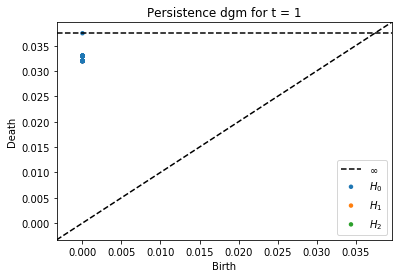

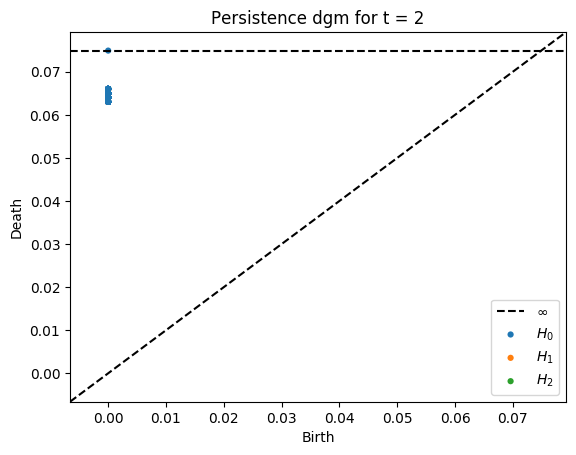

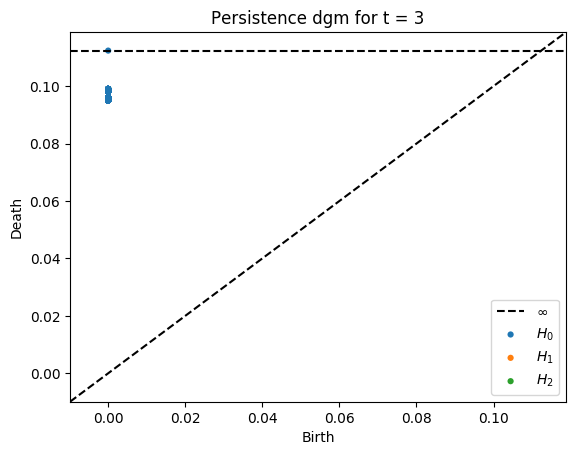

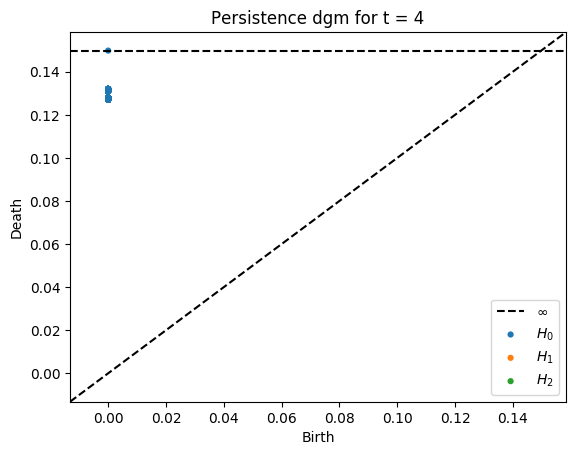

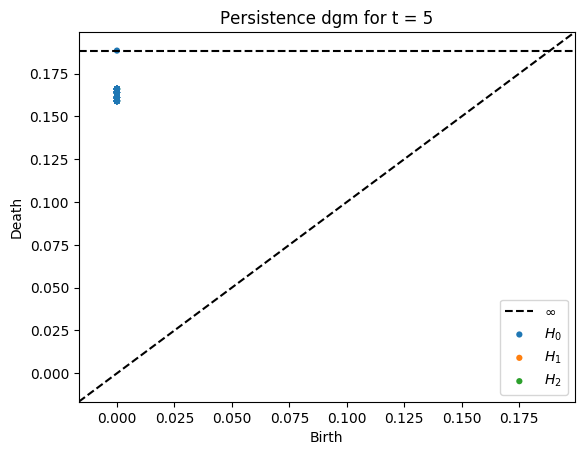

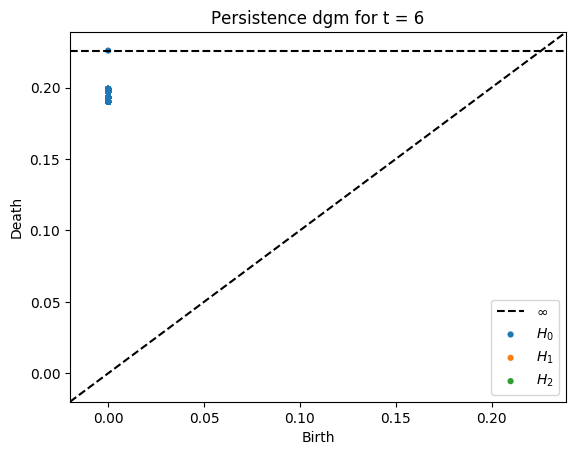

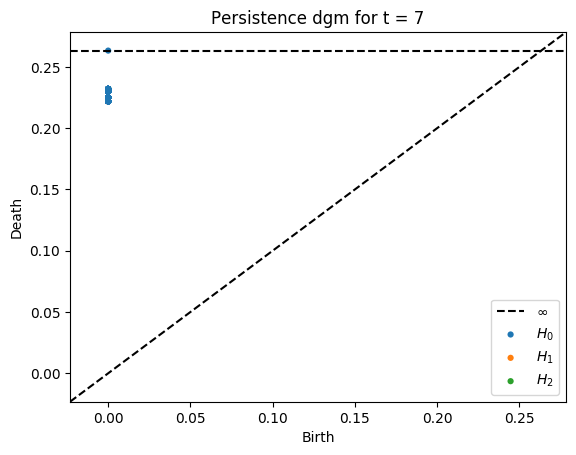

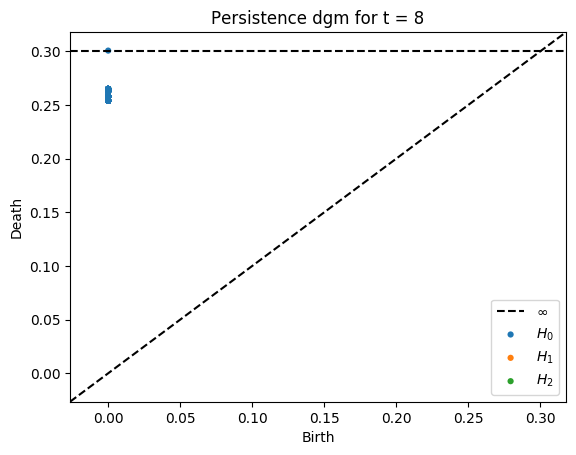

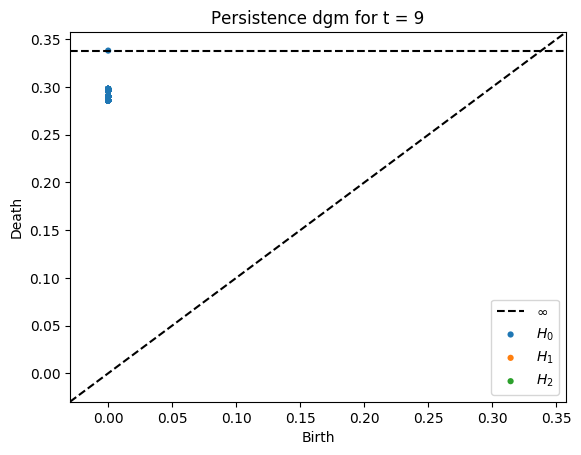

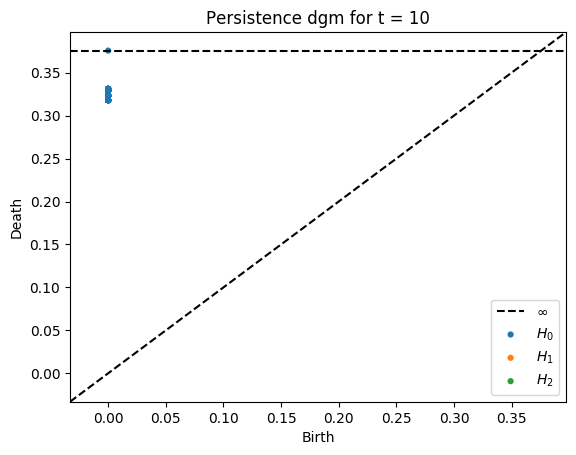

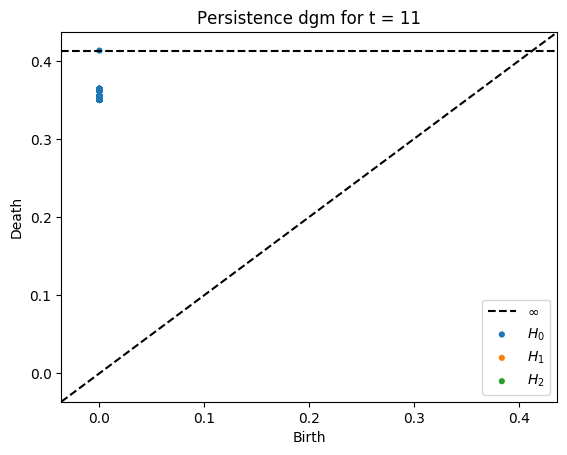

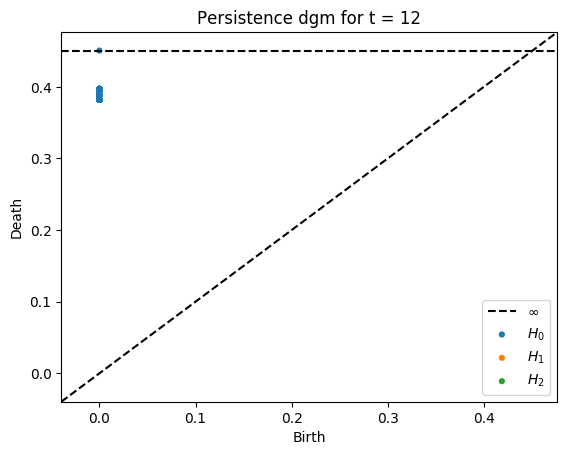

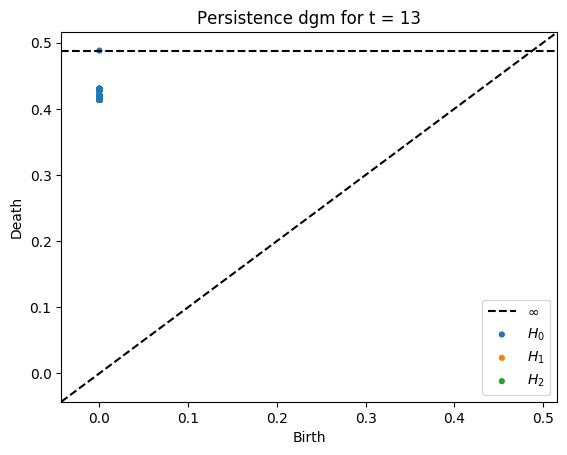

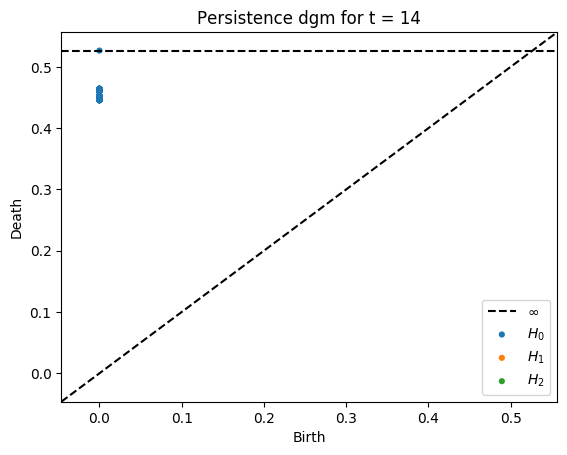

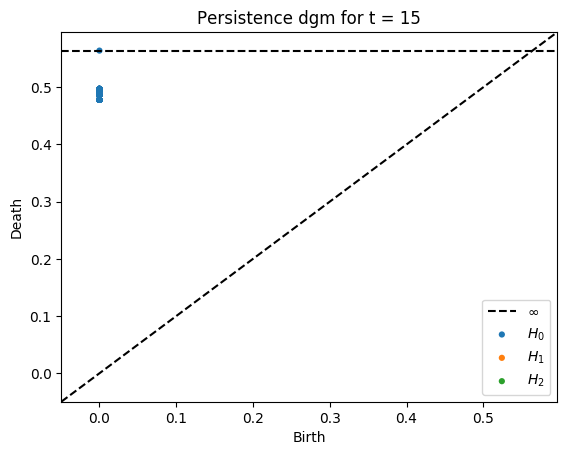

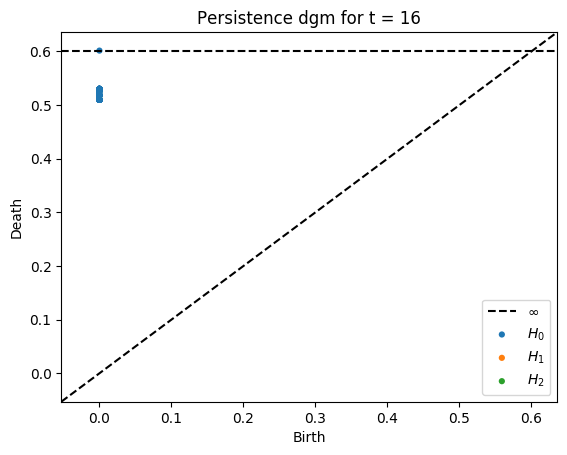

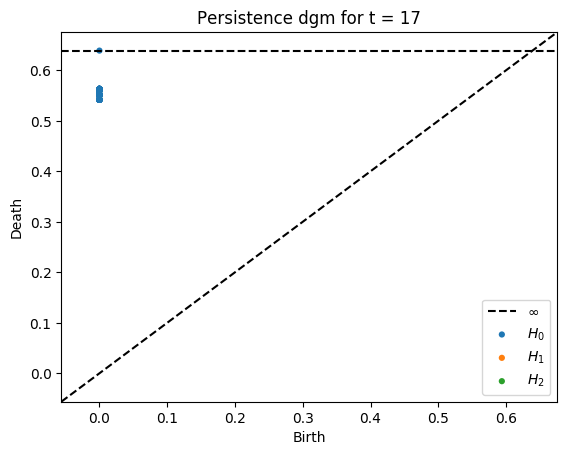

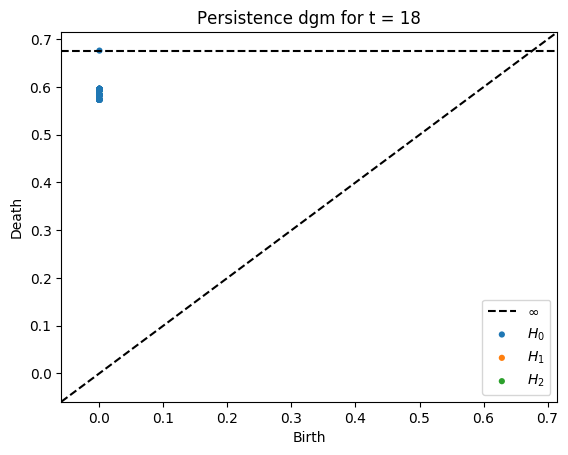

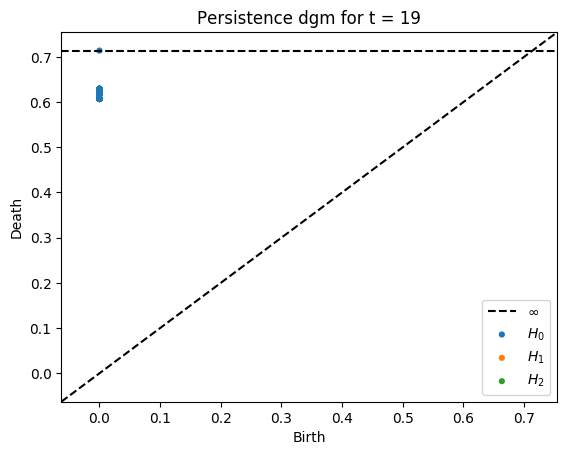

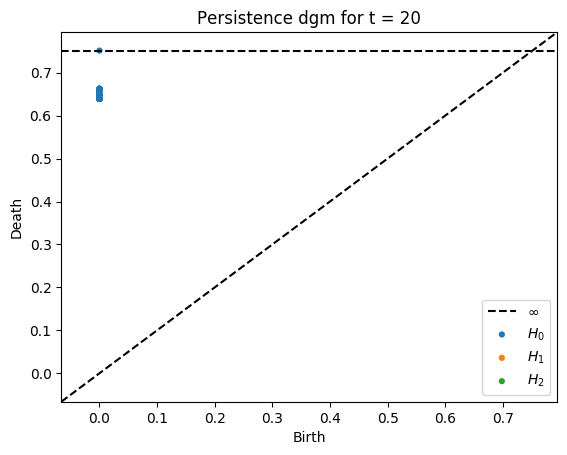

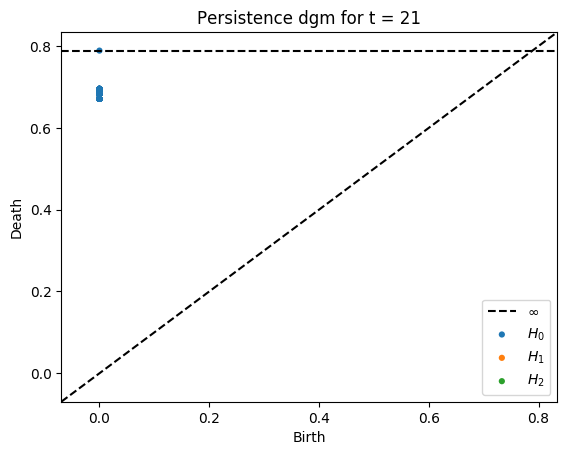

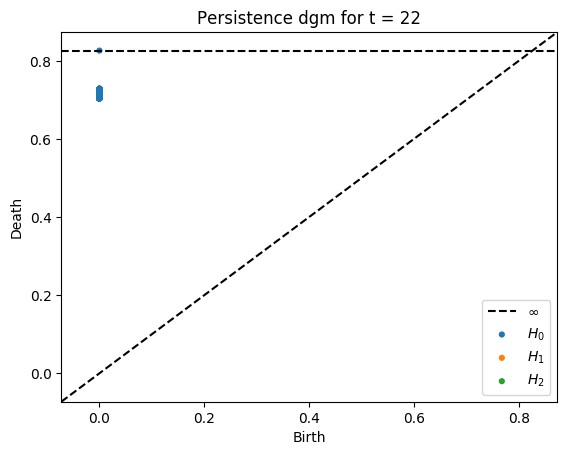

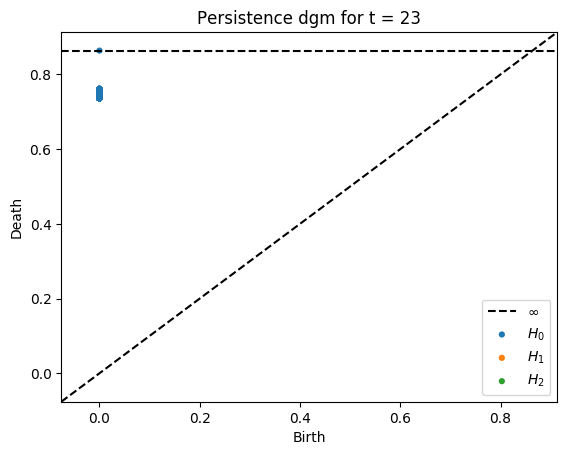

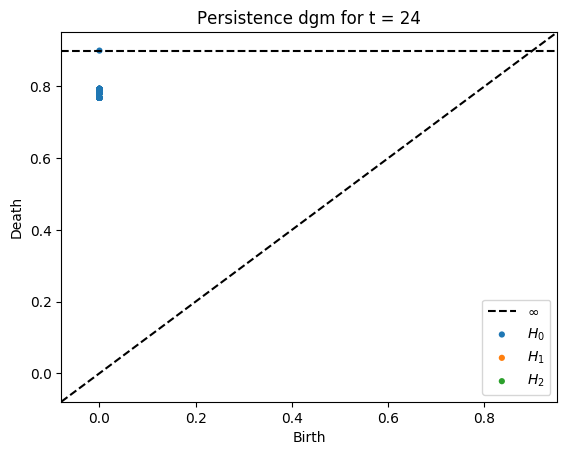

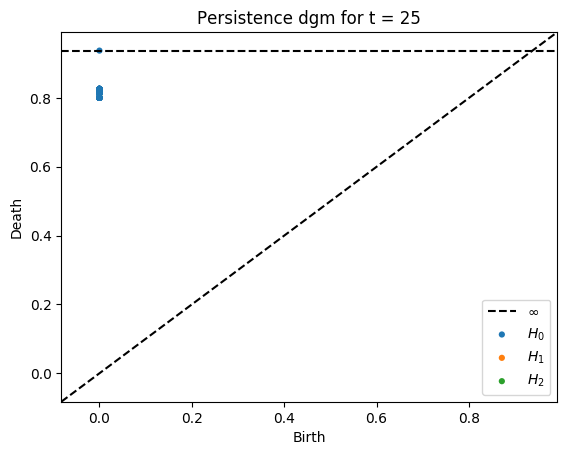

In [5]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(t2s.bifilt.shape[0]):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=2)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)